# Does a Relationship Exist Between Restaurant Density and Personal Income Per Capita?

## 1. Introduction
It is no question that fast food restaurants make up a generous portion of the United States' GDP. Due to it's low production cost and great taste, fast food is sold at a low cost, further increasing it's vast popularity. According to specific assumptions made in microeconomics, fast food is an inferior good; meaning as an individual's income increases the rate of purchases that are made on fast food will deccrease. Restaurant density is the proportion of restaurants to population. This shows the concentration of restaurants in a given area. Also, burgers are reported to be the most common purchased fast food. Thus, I want to investigate the correlation between restaurant density(independant variable) and income per capita(outcome) in a given state. I will also investigate burger restaurant density(independant variable) in order to observe it's relationship with income per capita has with restaurant_density.

The original fast food dataset was imported from Kaggle. Due to the absence of the variable income per capita, it is necesserry to import online datasets that contain population and per capita income. Additionally, using the Bureau of Economic Analysis database, I was able to import and eventually merge this dataframe to a new dataset consisting of all necessary variables to solve this question.

NOTE: I originally wanted to investigate the correlation between restaurant density and income per capita in a given city instead of a state in order to have more datapoints; however, I ran in to difficulties. I will first outline my original process and show what happened, in order to prove that it was most feasible to group corresponding data frames by state instead.


## 2. Import Packages

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np




## 3. Import and Read in Datasets

In [3]:
restaurants = pd.read_csv('Datasets/Datafiniti_Fast_Food_Restaurants_May19.csv')
income = pd.read_csv('Datasets/county_income.csv')


In [4]:
print(restaurants.shape)
pd.set_option("max_colwidth",200)
restaurants.head()

(10000, 16)


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/carls-jr-7001402,https://www.carlsjr.com/?utm_source=Yextandutm_medium=Visit%20Websiteandutm_campaign=Homepage
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,"http://www.citysearch.com/profile/772076870/grand_junction_co/del_taco.html,https://www.yellowpages.com/grand-junction-co/mip/del-taco-475739804,https://www.tripadvisor.com/Restaurant_Review-g3345...",http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/mip/which-wich-481453650,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chipotle-mexican-grill-537241840,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco-bell-459444587,https://locations.tacobell.com/co/denver/5225-e-colfax-ave.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=004051andutm_content=website


In [5]:
print(income.shape)
income.head()

(9420, 5)


,GeoFips,GeoName,LineCode,Description,2019
0,1001,"Autauga, AL",1,Personal income (thousands of dollars),2474364
1,1001,"Autauga, AL",2,Population (persons) 1/,55769
2,1001,"Autauga, AL",3,Per capita personal income (dollars) 2/,44368
3,1003,"Baldwin, AL",1,Personal income (thousands of dollars),10791564
4,1003,"Baldwin, AL",2,Population (persons) 1/,223565


It is evident that some of the data must be cleaned in our income dataframe. Firstly, it is evident that the values of the 'Description' variables should be columns and the newly added columns will take values corresponding to the '2019' column.

In [6]:
income = income.pivot(values='2019', index='GeoName', columns='Description').reset_index()
income.head()

Description,GeoName,Per capita personal income (dollars) 2/,Personal income (thousands of dollars),Population (persons) 1/
0,"Abbeville, SC",35065,862034,24584
1,"Acadia, LA",37337,2322653,62207
2,"Accomack, VA",49695,1606389,32325
3,"Ada, ID",54506,26265476,481880
4,"Adair, IA",51911,368672,7102


Now, I want to find the number of restaurants grouped by each city and create a new data frame that contains values of a given city in the United states and the number of restaurants that city contains.

In [7]:
rest_count = restaurants.groupby(['city', 'province']).size().reset_index() 
rest_count['GeoName'] = rest_count['city'] + ", " + rest_count['province']
rest_count = rest_count.rename({0: 'num_restaurants'}, axis = 1)
rest_count = rest_count[['GeoName', 'num_restaurants']]
rest_count



,GeoName,num_restaurants
0,"Abbeville, AL",2
1,"Abbeville, SC",1
2,"Aberdeen, MD",1
3,"Aberdeen, NC",1
4,"Aberdeen, WA",3
...,...,...
3412,"Zanesville, OH",6
3413,"Zebulon, GA",1
3414,"Zelienople, PA",1
3415,"Zephyrhills, FL",1


Finally, I can merge the income dataframe and the rest_count data frame. Notice once I merge, I lose alot of data as there are now only 284 rows. This means that the income database and the original dataset('restaurants') only have 284 common cities. Due to the loss of data, it is unfeasible to work with an even smaller sample size. Therefore, I grouped by state instead of city.  

In [8]:
Rest_city = pd.merge(income, rest_count, on="GeoName")
Rest_city 

,GeoName,Per capita personal income (dollars) 2/,Personal income (thousands of dollars),Population (persons) 1/,num_restaurants
0,"Abbeville, SC",35065,862034,24584,1
1,"Aiken, SC",44503,7623405,171300,4
2,"Aitkin, MN",41614,659213,15841,1
3,"Alameda, CA",78839,131535494,1668412,3
4,"Alamosa, CO",38403,622131,16200,1
...,...,...,...,...,...
279,"Winnebago, IL",43972,12420505,282465,1
280,"Yakima, WA",43910,11045587,251552,11
281,"Yankton, SD",51910,1185459,22837,1
282,"York, NE",50703,690164,13612,1


The Bureau of Econbomic Analysis Database allowed me to import the same dataset grouped by state instead of city. I import the files and organize/clean the data using similar methods with the previous dataframe. 

In [10]:
income_state = pd.read_csv("Datasets/income_state.csv")
income_state["State"] = income_state.GeoName.str.replace(" \*", "")
state = pd.read_csv("Datasets/state_abbreviations.csv")
income_state = pd.merge(income_state, state, on='State')
income_state = income_state.pivot(values='2019', index='Code', columns='Description').reset_index()
print(income_state.shape)
income_state.head()


(51, 4)


/var/folders/dl/pkdj8n7n6ps84w7d_v3vr0200000gn/T/ipykernel_9390/4290504551.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  income_state["State"] = income_state.GeoName.str.replace(" \*", "")


Description,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/
0,AK,41899.7,57115.0,733603.0
1,AL,196131.2,39962.0,4907965.0
2,AR,122878.1,40675.0,3020985.0
3,AZ,300174.7,41166.0,7291843.0
4,CA,2172607.7,55090.0,39437610.0


Now that I cleaned the dataframe grouped by state, I found the number of restaurants for each state. Then, I merged 'income_state' dataframe and the 'rest_count' dataframe which contains the number of restaurants in a given state. 

In [11]:
rest_count = restaurants.groupby(['province']).size().reset_index() 
rest_count.columns = ['Code', 'num_restaurants']
temp = pd.merge(income_state, rest_count, on='Code', how="outer")
temp.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants
0,AK,41899.7,57115.0,733603.0,64.0
1,AL,196131.2,39962.0,4907965.0,635.0
2,AR,122878.1,40675.0,3020985.0,124.0
3,AZ,300174.7,41166.0,7291843.0,186.0
4,CA,2172607.7,55090.0,39437610.0,727.0


Furthermore, I have found the number of burger restaurants in a given state. I included this data in to the previous dataframe. additionally, I have mutated two columns, 'rest_burger_density' and 'restaurant_density'. I finally initialized my main dataframe as it contains all variables I need to perform data analysis, visualizations and predictions.

In [12]:
burger_restaurants = restaurants.loc[restaurants.categories.str.lower().str.contains("burger")]
burger_restaurants = burger_restaurants.groupby('province').size().reset_index()
burger_restaurants.columns = ['Code', 'num_burger_restaurants']
df_main = pd.merge(temp, burger_restaurants, on='Code')
df_main['restaurant_density'] = df_main['num_restaurants'] / df_main['Population (persons) 1/']
df_main['burger_rest_density'] = df_main['num_burger_restaurants'] / df_main['Population (persons) 1/']
df_main.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants,num_burger_restaurants,restaurant_density,burger_rest_density
0,AK,41899.7,57115.0,733603.0,64.0,14,0.000087,0.000019
1,AL,196131.2,39962.0,4907965.0,635.0,221,0.000129,0.000045
2,AR,122878.1,40675.0,3020985.0,124.0,49,0.000041,0.000016
3,AZ,300174.7,41166.0,7291843.0,186.0,81,0.000026,0.000011
4,CA,2172607.7,55090.0,39437610.0,727.0,237,0.000018,0.000006


## 3. Summary Statistics

Lets view the summary statistics on 'num_restaurants' and 'restaurant_density' in order to later analyze which one is a better predictor

In [13]:
df_main[['Per capita disposable personal income (dollars) 2/', 'restaurant_density', 'burger_rest_density']].describe()

,Per capita disposable personal income (dollars) 2/,restaurant_density,burger_rest_density
count,46.000000,4.600000e+01,4.600000e+01
mean,47868.543478,3.774336e-05,1.223233e-05
std,6798.918328,2.522020e-05,7.367714e-06
min,36031.000000,2.249400e-07,1.124700e-07
25%,43585.750000,2.321761e-05,7.339480e-06
50%,46491.500000,3.230678e-05,1.121617e-05
75%,51511.750000,4.043670e-05,1.556070e-05
max,67854.000000,1.293815e-04,4.502885e-05


## 4. Visualization

<AxesSubplot:xlabel='restaurant_density', ylabel='Per capita disposable personal income (dollars) 2/'>

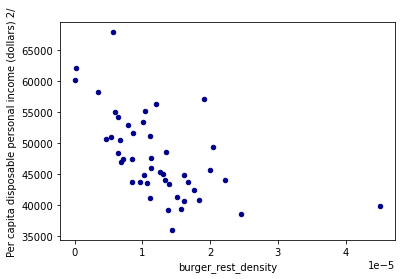

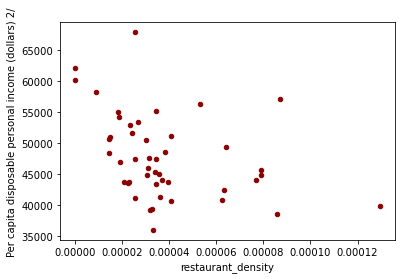

In [14]:
df_main.plot.scatter(x='burger_rest_density', y='Per capita disposable personal income (dollars) 2/', c='DarkBlue')
df_main.plot.scatter(x='restaurant_density', y='Per capita disposable personal income (dollars) 2/', c='DarkRed')


array([[<AxesSubplot:title={'center':'burger_rest_density'}>]],
      dtype=object)

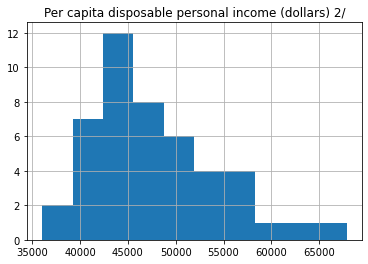

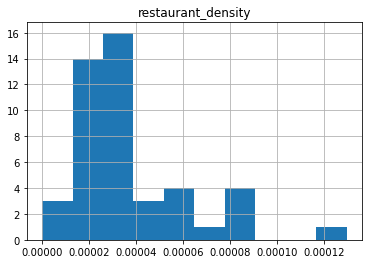

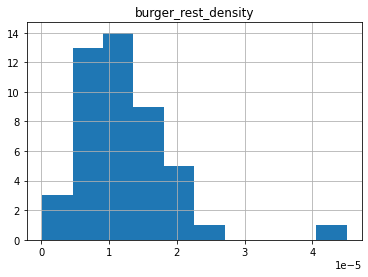

In [15]:
df_main.hist(column='Per capita disposable personal income (dollars) 2/')
df_main.hist(column = 'restaurant_density')
df_main.hist(column= 'burger_rest_density')